In [3]:
import h5py
import scipy.io as io
import PIL as Image
from PIL import Image as Image1
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
from scipy import spatial
import json
from matplotlib import cm as CM
#from image import *

In [8]:
def gaussian_filter_density(gt):
    #Generates a density map using Gaussian filter transformation
    
    density = np.zeros(gt.shape, dtype=np.float32)
    
    gt_count = np.count_nonzero(gt)
    
    if gt_count == 0:
        return density

    # FInd out the K nearest neighbours using a KDTree
    
    pts = np.array(list(zip(np.nonzero(gt)[1].ravel(), np.nonzero(gt)[0].ravel())))
    leafsize = 2048
    
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    
    # query kdtree
    distances, locations = tree.query(pts, k=4)

        
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        
        #Convolve with the gaussian filter
        
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    
    return density

In [13]:
root = 'data'


In [18]:
os.path

<module 'ntpath' from 'C:\\Users\\sudee\\anaconda3\\lib\\ntpath.py'>

In [19]:
os.getcwd() 

'C:\\Users\\sudee\\Documents\\GitHub\\CSRNet-keras'

In [20]:
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_train,part_A_test,part_B_train,part_B_test]

In [21]:
part_A_train

'data\\part_A_final/train_data\\images'

In [22]:
# List of all image paths

img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)
print(len(img_paths))

1198


In [23]:
file_path

'data\\part_B_final/test_data\\images\\IMG_99.jpg'

In [25]:
from tqdm import tqdm

i = 0
for img_path in tqdm(img_paths):
        
    
    # Load sparse matrix
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    
    #Read image
    img= plt.imread(img_path)
    
    # Create a zero matrix of image size
    k = np.zeros((img.shape[0],img.shape[1]))
    
    gt = mat["image_info"][0,0][0,0][0]
    
    #Generate hot encoded matrix of sparse matrix
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
            #verify whether values are vaid using
    
    # generate density map
    k = gaussian_filter_density(k)
    
    # File path to save density map
    file_path = img_path.replace('.jpg','.h5').replace('images','ground')
    
    
    with h5py.File(file_path, 'w') as hf:
            hf['density'] = k
    




  0%|          | 0/1198 [00:00<?, ?it/s]

  0%|          | 1/1198 [00:27<9:09:24, 27.54s/it]

  0%|          | 2/1198 [00:54<9:07:55, 27.49s/it]

  0%|          | 3/1198 [01:07<7:35:58, 22.89s/it]

  0%|          | 4/1198 [01:20<6:41:11, 20.16s/it]

  0%|          | 5/1198 [01:31<5:41:11, 17.16s/it]

  1%|          | 6/1198 [01:31<4:03:52, 12.28s/it]

  1%|          | 7/1198 [01:34<3:04:37,  9.30s/it]

  1%|          | 8/1198 [01:45<3:13:16,  9.74s/it]

  1%|          | 9/1198 [02:07<4:27:07, 13.48s/it]

  1%|          | 10/1198 [02:11<3:30:10, 10.61s/it]

  1%|          | 11/1198 [02:44<5:46:50, 17.53s/it]

  1%|          | 12/1198 [03:04<6:01:12, 18.27s/it]

  1%|          | 13/1198 [03:12<4:56:18, 15.00s/it]

  1%|          | 14/1198 [03:19<4:09:03, 12.62s/it]

  1%|▏         | 15/1198 [03:52<6:12:38, 18.90s/it]

  1%|▏         | 16/1198 [04:14<6:27:42, 19.68s/it]

  1%|▏         | 17/1198 [04:18<4:56:52, 15.08s/it]

  2%|▏         | 18/1198 [04:20<3:39:45, 11.17s/it]

  2%|▏     

 23%|██▎       | 274/1198 [1:01:19<4:17:20, 16.71s/it]

 23%|██▎       | 275/1198 [1:01:34<4:06:41, 16.04s/it]

 23%|██▎       | 276/1198 [1:01:43<3:35:39, 14.03s/it]

 23%|██▎       | 277/1198 [1:01:51<3:08:50, 12.30s/it]

 23%|██▎       | 278/1198 [1:02:49<6:39:35, 26.06s/it]

 23%|██▎       | 279/1198 [1:02:53<4:54:43, 19.24s/it]

 23%|██▎       | 280/1198 [1:02:57<3:44:54, 14.70s/it]

 23%|██▎       | 281/1198 [1:02:58<2:42:27, 10.63s/it]

 24%|██▎       | 282/1198 [1:03:12<3:00:26, 11.82s/it]

 24%|██▎       | 283/1198 [1:03:39<4:08:52, 16.32s/it]

 24%|██▎       | 284/1198 [1:04:07<5:00:36, 19.73s/it]

 24%|██▍       | 285/1198 [1:04:09<3:37:45, 14.31s/it]

 24%|██▍       | 286/1198 [1:04:11<2:42:12, 10.67s/it]

 24%|██▍       | 287/1198 [1:04:15<2:13:31,  8.79s/it]

 24%|██▍       | 288/1198 [1:04:22<2:03:24,  8.14s/it]

 24%|██▍       | 289/1198 [1:04:25<1:39:40,  6.58s/it]

 24%|██▍       | 290/1198 [1:04:29<1:29:50,  5.94s/it]

 24%|██▍       | 291/1198 [1:04:38<1:44:05,  6.8

 45%|████▍     | 538/1198 [2:00:48<1:32:37,  8.42s/it]

 45%|████▍     | 539/1198 [2:01:01<1:48:20,  9.86s/it]

 45%|████▌     | 540/1198 [2:01:10<1:44:24,  9.52s/it]

 45%|████▌     | 541/1198 [2:01:22<1:52:22, 10.26s/it]

 45%|████▌     | 542/1198 [2:01:27<1:34:35,  8.65s/it]

 45%|████▌     | 543/1198 [2:01:32<1:21:40,  7.48s/it]

 45%|████▌     | 544/1198 [2:01:45<1:40:19,  9.20s/it]

 45%|████▌     | 545/1198 [2:01:56<1:45:02,  9.65s/it]

 46%|████▌     | 546/1198 [2:02:05<1:42:47,  9.46s/it]

 46%|████▌     | 547/1198 [2:02:13<1:38:40,  9.10s/it]

 46%|████▌     | 548/1198 [2:02:18<1:25:27,  7.89s/it]

 46%|████▌     | 549/1198 [2:02:28<1:32:46,  8.58s/it]

 46%|████▌     | 550/1198 [2:02:34<1:23:08,  7.70s/it]

 46%|████▌     | 551/1198 [2:02:43<1:28:30,  8.21s/it]

 46%|████▌     | 552/1198 [2:02:50<1:23:55,  7.80s/it]

 46%|████▌     | 553/1198 [2:03:00<1:31:16,  8.49s/it]

 46%|████▌     | 554/1198 [2:03:09<1:31:43,  8.55s/it]

 46%|████▋     | 555/1198 [2:03:16<1:27:50,  8.2

 67%|██████▋   | 804/1198 [2:35:27<44:28,  6.77s/it]

 67%|██████▋   | 805/1198 [2:35:40<56:36,  8.64s/it]

 67%|██████▋   | 806/1198 [2:35:47<54:44,  8.38s/it]

 67%|██████▋   | 807/1198 [2:35:55<52:05,  7.99s/it]

 67%|██████▋   | 808/1198 [2:36:03<52:28,  8.07s/it]

 68%|██████▊   | 809/1198 [2:36:10<51:19,  7.92s/it]

 68%|██████▊   | 810/1198 [2:36:18<50:56,  7.88s/it]

 68%|██████▊   | 811/1198 [2:36:24<47:40,  7.39s/it]

 68%|██████▊   | 812/1198 [2:36:30<43:48,  6.81s/it]

 68%|██████▊   | 813/1198 [2:36:37<43:25,  6.77s/it]

 68%|██████▊   | 814/1198 [2:36:41<39:44,  6.21s/it]

 68%|██████▊   | 815/1198 [2:36:50<43:14,  6.77s/it]

 68%|██████▊   | 816/1198 [2:37:02<54:27,  8.55s/it]

 68%|██████▊   | 817/1198 [2:37:10<51:57,  8.18s/it]

 68%|██████▊   | 818/1198 [2:37:15<47:30,  7.50s/it]

 68%|██████▊   | 819/1198 [2:37:22<45:16,  7.17s/it]

 68%|██████▊   | 820/1198 [2:37:27<41:27,  6.58s/it]

 69%|██████▊   | 821/1198 [2:37:36<46:34,  7.41s/it]

 69%|██████▊   | 822/1198 [2

 90%|████████▉ | 1075/1198 [3:11:26<19:56,  9.73s/it]

 90%|████████▉ | 1076/1198 [3:11:32<17:47,  8.75s/it]

 90%|████████▉ | 1077/1198 [3:11:43<18:42,  9.28s/it]

 90%|████████▉ | 1078/1198 [3:11:51<17:47,  8.89s/it]

 90%|█████████ | 1079/1198 [3:11:55<15:00,  7.57s/it]

 90%|█████████ | 1080/1198 [3:12:03<15:02,  7.65s/it]

 90%|█████████ | 1081/1198 [3:12:10<14:12,  7.29s/it]

 90%|█████████ | 1082/1198 [3:12:16<13:45,  7.12s/it]

 90%|█████████ | 1083/1198 [3:12:22<12:59,  6.78s/it]

 90%|█████████ | 1084/1198 [3:12:30<13:34,  7.15s/it]

 91%|█████████ | 1085/1198 [3:12:37<12:58,  6.89s/it]

 91%|█████████ | 1086/1198 [3:12:41<11:21,  6.09s/it]

 91%|█████████ | 1087/1198 [3:12:51<13:45,  7.43s/it]

 91%|█████████ | 1088/1198 [3:12:57<12:41,  6.92s/it]

 91%|█████████ | 1089/1198 [3:13:03<12:03,  6.64s/it]

 91%|█████████ | 1090/1198 [3:13:11<12:38,  7.03s/it]

 91%|█████████ | 1091/1198 [3:13:19<12:55,  7.24s/it]

 91%|█████████ | 1092/1198 [3:13:24<11:40,  6.61s/it]

 91%|█████

In [48]:
print(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
print("-------**********************************-----------")
print(k)
print("-------**********************************-----------")
print(gt)
print("-------**********************************-----------")
print(file_path)

data\part_B_final/test_data\ground_truth\GT_IMG_99.mat
-------**********************************-----------
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [7.3202764e-06 7.3320216e-06 7.3424007e-06 ... 1.7773458e-05
  1.7572180e-05 1.7370006e-05]
 [7.1530799e-06 7.1645568e-06 7.1746990e-06 ... 1.7488357e-05
  1.7290360e-05 1.7091483e-05]
 [6.9883831e-06 6.9995958e-06 7.0095048e-06 ... 1.7205335e-05
  1.7010592e-05 1.6814985e-05]]
-------**********************************-----------
[[   9.68136365  643.40913135]
 [  31.98263407  414.82110957]
 [  51.49624569  333.97900431]
 [ 110.03708053  423.18408598]
 [ 161.60876837  437.12237999]
 [ 220.14960322  452.4545034 ]
 [ 282.87192627  410.63962137]
 [ 511.45994804  563.96085549]
 [ 956.09152699  694.980819

In [55]:
mat["image_info"][0,0][0,0][0]

array([[   9.68136365,  643.40913135],
       [  31.98263407,  414.82110957],
       [  51.49624569,  333.97900431],
       [ 110.03708053,  423.18408598],
       [ 161.60876837,  437.12237999],
       [ 220.14960322,  452.4545034 ],
       [ 282.87192627,  410.63962137],
       [ 511.45994804,  563.96085549],
       [ 956.09152699,  694.98081919],
       [ 965.8483328 ,  647.59061955],
       [ 570.00078289,  495.66321483],
       [ 622.96630013,  478.93726202],
       [ 599.27120031,  452.4545034 ],
       [ 558.85014768,  439.91003879],
       [ 507.27845984,  466.39279741],
       [ 157.42728017,  327.0098573 ],
       [ 437.58698979,  367.43090993],
       [ 145.92818761,  309.58698979],
       [ 180.07700794,  302.61784278],
       [ 186.34924024,  283.10423117],
       [ 194.71221665,  270.55976656],
       [ 190.53072844,  258.71221665],
       [ 176.59243443,  254.53072844],
       [ 267.8882602 ,  267.07519305],
       [ 267.1913455 ,  247.56158144],
       [ 282.52346892,  2

In [25]:
img_paths[-1]

'data\\part_B_final/test_data\\images\\IMG_99.jpg'

In [26]:
file_path = img_paths[22].replace('.jpg','.h5').replace('images','ground') 
print(file_path)

data\part_A_final/train_data\ground\IMG_119.h5


Sum =  210.5669


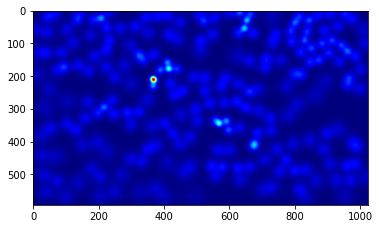

In [33]:
#Sample Ground Truth
gt_file = h5py.File(file_path,'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)
print("Sum = " ,np.sum(groundtruth))

data\part_A_final/train_data\images\IMG_119.jpg


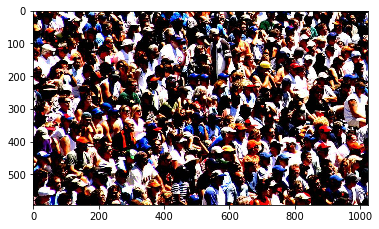

In [34]:
# Image corresponding to the ground truth
img = Image1.open(file_path.replace('.h5','.jpg').replace('ground','images'))
plt.imshow(img)
print(file_path.replace('.h5','.jpg').replace('ground','images'))